----
#**In-Class Assignment: Applying XGBOOST to the Iris Dataset for Classification**

Date: 10/11/2023

**Abstract**: This assignment explores XGBoost's capabilities for classifying Iris flowers based on petal and sepal measurements. It outlines the data preparation and model training process, highlighting XGBoost's potential for accurate classification tasks.

----

Importing necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The load_iris function is used to load the Iris dataset into the iris variable.

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [42]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

 The feature data (X) and target labels (y) are extracted from the Iris dataset. X contains features like sepal length, sepal width, petal length, and petal width, while y contains the target labels (0, 1, 2) corresponding to the species of iris flowers.

In [44]:
X = iris.data
y = iris.target

The dataset is split into training and testing sets using scikit-learn's train_test_split function. 80% of the data is used for training, and 20% is reserved for testing.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

An XGBoost classifier is created and assigned to the variable xgboost_ins using xgb.XGBClassifier(). This classifier will be used for the classification task.


In [46]:
import xgboost as xgb
xgboost_ins = xgb.XGBClassifier()

In [47]:
X_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9]])

The XGBoost classifier is trained on the training data using the fit method.

In [48]:
xgboost_ins.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

The trained model is used to make predictions on the test data, and the accuracy of the model on the test data is calculated.

In [49]:
prediction_result = xgboost_ins.predict(X_test)

In [50]:
xgboost_ins.score(X_test,y_test)        # ->>>> 0.9333333333333333

0.9333333333333333

 The accuracy is approximately 93.33%.

**Data Visualization**

A DataFrame named df_comparison is created to store the actual target labels (Actual) and the predictions made by the model (XGBOOST_pred) for the test data.

In [51]:
df_comparison = pd.DataFrame({'Actual': y_test, 'XGBOOST_pred':prediction_result})

In [52]:
df_comparison.head(7)

,Actual,XGBOOST_pred
0,0,0
1,1,0
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2


Visualizing the comparison using seaborn and matplotlib.


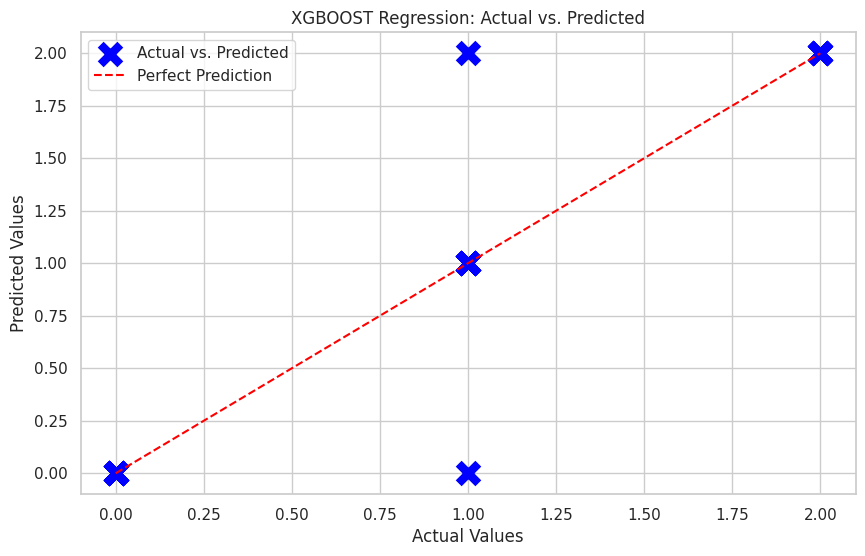

In [53]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='XGBOOST_pred', data=df_comparison, color='blue', marker='x', label='Actual vs. Predicted',s = 200, linewidth = 6)
plt.plot([min(df_comparison['Actual']), max(df_comparison['Actual'])], [min(df_comparison['Actual']), max(df_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('XGBOOST Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.legend()

plt.show()


**Conclusion:** This implementation successfully demonstrated the effective utilization of XGBoost for classifying Iris flowers based on their petal and sepal measurements. With an accuracy of approximately 93.33%, XGBoost showcases its prowess in accurate classification tasks.